# Configurações e leitura dos dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import csv

pd.set_option('display.max_columns', None)

In [2]:
#https://github.com/dobraga/data_science_toolkit
from dstools.analysis import Corr, word_counts
from dstools.preprocess import TransformBinary, OrdinalEncoder, TransformNewColumn

Primeiramente serão descartadas as colunas duplicadas, com pouca variação e até colunas que não serão utilizadas.

In [3]:
with open('../input/listings.csv') as f:
    columns = f.readline()

In [4]:
not_use = ('listing_url','scrape_id','last_scraped','thumbnail_url','medium_url', 'space', 'summary', 'interaction',
           'host_url','host_name','host_thumbnail_url','host_picture_url', 'market', 'name', 'neighborhood_overview',
           'picture_url', 'xl_picture_url', 'city', 'state' , 'zipcode', 'host_location', 'neighbourhood', 'house_rules',
           'market', 'smart_location', 'country_code' ,'country', 'street', 'host_location', 'access')

cols_use = [col.replace('\n', '') for col in columns.split(',') if col not in not_use]

In [5]:
df = pd.read_csv(
    '../input/listings.csv', 
    low_memory=False,
    index_col=['id', 'host_id'],
    usecols=cols_use,
    parse_dates=["host_since", "first_review", "last_review"],
    na_values = ['none']
)

In [6]:
df.head(5)

,,description,experiences_offered,notes,transit,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,68997,Pls note that special rates apply for Carnival...,NaN,NaN,Excellent location. Close to all major public ...,2010-01-08,I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,NaN,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$332.00,NaN,NaN,$0.00,$378.00,2,$63.00,4,30,4,4,30,30,4.0,30.0,a week ago,t,23,31,35,303,2019-11-22,243,27,2010-07-15,2019-11-11,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
25026,102840,"Our apartment is a little gem, everyone loves ...",NaN,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,2010-04-03,"Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,91%,NaN,f,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Copacabana,NaN,-22.97712,-43.19045,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$160.00,NaN,NaN,"$1,000.00",$250.00,2,$45.00,7,60,7,7,60,60,7.0,60.0,5 weeks ago,t,16,22,35,119,2019-11-22,235,17,2010-06-07,2019-10-08,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.04
31560,135635,This nice and clean 1 bedroom apartment is loc...,NaN,NaN,"Bus, U-Bahn, Taxi und Leihfahrräder in der Nähe.",2010-05-31,I was born and raised in Rio de (Website hidde...,within an hour,100%,NaN,t,Ipanema,1.0,1.0,"['email', 'phone', 'manual_online', 'facebook'...",t,t,Ipanema,NaN,-22.98302,-43.21427,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$273.00,NaN,NaN,$0.00,$84.00,2,$42.00,2,1125,2,5,1125,1125,2.1,1125.0,today,t,2,5,9,88,2019-11-22,271,42,2010-07-11,2019-11-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.38
35636,153232,This cosy apartment is just a few steps away ...,NaN,Please include the following information with ...,Metro stop just 5 blocks from our place. Buses...,2010-06-27,"I am Brazilian and Carioca graphic designer, b...",within an hour,100%,NaN,t,Ipanema,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,Ipanema,NaN,-22.98816,-43.19359,t,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$378.00,NaN,"$9,656.00","$1,050.

# Variável Resposta

## Ajuste da variável

Primeiro transformaremos a variável resposta em valores numéricos.

In [7]:
def to_numeric(value):
    return 0 if value is np.nan else float(value.replace('$', '').replace(',', ''))

In [8]:
df['price'] = df.price.apply(to_numeric)

## Valores extremos

In [9]:
df.price.describe()

count    33715.000000
mean       651.860537
std       1695.447098
min          0.000000
25%        151.000000
50%        290.000000
75%        600.000000
max      41982.000000
Name: price, dtype: float64

In [10]:
df[df.price == 0].size

532

In [11]:
df[df.price == 0].head(3)

,,description,experiences_offered,notes,transit,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20269038,100693784,"apt,com microondas,liquidificador,cafeteira,sa...",NaN,NaN,NaN,2016-10-21,NaN,within an hour,83%,NaN,f,Copacabana,5.0,5.0,"['email', 'phone', 'reviews']",t,f,Jacarepaguá,NaN,-22.97320,-43.41019,t,Apartment,Entire home/apt,4,1.0,2.0,4.0,Real Bed,"{TV,Kitchen,""Free parking on premises"",Hangers...",NaN,0.0,NaN,NaN,NaN,NaN,1,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,2 months ago,t,27,57,87,362,2019-11-22,4,3,2018-11-12,2019-05-12,80.0,8.0,8.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,4,4,0,0,0.32
21144730,107465765,The house is very comfortable and has lots of ...,NaN,NaN,"By foot, metro, buses or by bike",2016-12-16,"Amo viaggiare, ospitare le persone nelle mie b...",within a few hours,90%,NaN,f,Copacabana,17.0,17.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,f,Copacabana,NaN,-22.96854,-43.18862,t,Bed and breakfast,Hotel room,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,""...",NaN,0.0,NaN,NaN,$0.00,$0.00,1,$75.00,3,1125,3,5,1125,1125,3.1,1125.0,2 weeks ago,t,22,27,27,296,2019-11-22,1,0,2018-09-11,2018-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,4,1,0,0,0.07
21174310,107465765,The house is very comfortable and has lots of ...,NaN,NaN,The neighborhood is definitely the most real a...,2016-12-16,"Amo viaggiare, ospitare le persone nelle mie b...",within a few hours,90%,NaN,f,Copacabana,17.0,17.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,f,Copacabana,NaN,-22.96869,-43.18838,t,Bed and breakfast,Hotel room,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",NaN,0.0,NaN,NaN,$0.00,$0.00,1,$75.00,3,1125,3,5,1125,1125,3.0,1125.0,2 weeks ago,t,14,41,71,342,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,4,1,0,0,NaN


Como esperado, acessando os links, não foi encontrado nenhum aluguel zerado, serão considerados como erro na obtenção dos dados e serão eliminados.

In [12]:
df = df[df.price != 0]

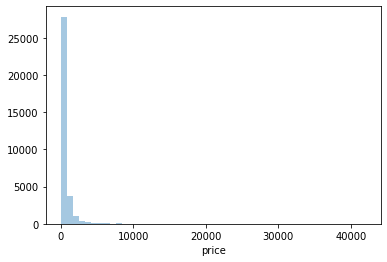

In [13]:
sns.distplot(df.price, kde=False)

Como a maioria das variáveis relacionadas a valor, a variável possui uma distribuição assimétrica.

Serão analisados alguns casos.

In [14]:
df.sort_values('price', ascending = False).head(5)

,,description,experiences_offered,notes,transit,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13278620,74838468,Meu espaço é 5 MINUTOS DO PARQUE OLÍMPICO E CE...,NaN,NaN,NaN,2016-05-30,"Casa condominio Malibu, segurança máxima,Barra...",NaN,NaN,NaN,f,Barra da Tijuca,1.0,1.0,"['email', 'phone', 'facebook']",t,f,Barra da Tijuca,NaN,-23.00442,-43.39638,t,Apartment,Entire home/apt,16,7.0,8.0,14.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",NaN,41982.0,NaN,NaN,"$21,411.00","$11,755.00",1,$0.00,16,90,16,16,90,90,16.0,90.0,39 months ago,t,23,53,83,83,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,NaN
11909226,63368759,apartamento de fundos com varandão vista para ...,NaN,NaN,NaN,2016-03-17,NaN,NaN,NaN,NaN,f,Copacabana,1.0,1.0,"['email', 'phone']",t,f,Copacabana,NaN,-22.96740,-43.19354,t,Apartment,Entire home/apt,4,3.0,2.0,4.0,Real Bed,"{""Cable TV"",Wifi,""Air conditioning"",Kitchen,""F...",NaN,41982.0,NaN,NaN,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,45 months ago,t,30,60,90,365,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,NaN
12103702,64890978,RENT FOR THE MONTH GAMES OLYMPIC HOUSE IN COND...,NaN,NaN,NaN,2016-03-29,NaN,NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone']",t,f,Barra da Tijuca,NaN,-23.00665,-43.34340,f,House,Entire home/apt,1,8.0,5.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,41982.0,NaN,NaN,"$21,411.00",NaN,1,$0.00,30,30,30,30,30,30,30.0,30.0,44 months ago,t,30,60,90,365,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,NaN
14106421,84942794,"Viva com luxo, conforto e segurança nas Olimpí...",NaN,NaN,NaN,2016-07-20,NaN,NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone']",t,f,Itanhangá,NaN,-22.98806,-43.30390,f,House,Entire home/apt,14,8.0,6.0,12.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",NaN,41982.0,NaN,NaN,"$20,991.00",NaN,1,$0.00,7,1125,7,7,1125,1125,7.0,1125.0,41 months ago,t,0,0,0,0,2019-11-22,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,NaN
6571778,13372759,Cobertura em laranjeiras com Piscina e Churras...,NaN,NaN,"Ônibus, metro e Táxi próximos. 2 vagas de garagem",2014-03-21,NaN,within a day,100%,NaN,f,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,Laranjeiras,NaN,-22.93635,-43.18820,f,Apartment,Entire home/apt,7,3.5,3.0,5.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",P...",NaN,41982.0,NaN,"$125,946.00",NaN,NaN,1,$0.00,30,30,30,30,30,30,30.0,30.0,13 months ago,t,0,0,0,0,2019-11-22,0,0,N

Abrindo o link de alguns desses, parecem serem erros de inputação(não sei como e nem quem define o preço da diária), provavelmente são outliers.

Como por exemplo o https://www.airbnb.com.br/rooms/11909226, mandei uma mensagem para validar esse valor.

In [15]:
df.groupby('number_of_reviews').agg(
    {
        'price': ['min','max','mean', 'count'],
    }
)

price                             
                     min      max         mean  count
number_of_reviews                                    
0                   29.0  41982.0  1025.765845  14563
1                   17.0  35500.0   478.885422   4294
2                   34.0  20000.0   432.799589   2435
3                   38.0  31398.0   396.056304   1634
4                   38.0   6507.0   341.263203   1155
...                  ...      ...          ...    ...
338                378.0    378.0   378.000000      1
347                332.0    332.0   332.000000      1
361                101.0    101.0   101.000000      1
366                202.0    202.0   202.000000      1
372                 71.0    315.0   193.000000      2

[250 rows x 4 columns]

In [16]:
df.number_of_reviews.value_counts(normalize=True)

0      0.432034
1      0.127388
2      0.072238
3      0.048475
4      0.034265
         ...   
199    0.000030
294    0.000030
189    0.000030
229    0.000030
287    0.000030
Name: number_of_reviews, Length: 250, dtype: float64

As estadias sem review possuem uma média consideravelmente maior, focaremos a nossa análise nas estadias com pelo menos um review pois certamente já foram alugadas. O ideal é que fossem consideradas apenas aqueles que ja tenham sido alugadas, porém serve como uma va

In [17]:
df = df[df.number_of_reviews > 0]

In [18]:
df.sort_values('price', ascending = False).head(5)

,,description,experiences_offered,notes,transit,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32382405,89415275,Casa triplex c/1 vaga na garagem 1 suíte ampla...,NaN,NaN,Dispomos de transporte público acessível 100 m...,2016-08-11,NaN,NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'facebook']",t,f,Campinho,NaN,-22.88742,-43.34252,t,House,Entire home/apt,5,3.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",NaN,35500.0,NaN,NaN,NaN,$100.00,1,$50.00,2,10,2,2,10,10,2.0,10.0,9 months ago,t,0,0,0,0,2019-11-22,1,1,2019-03-04,2019-03-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.11
13280101,74868897,L'appartement est idéalement situé au début de...,NaN,NaN,"Métro à 10 minutes, Bus à 5 minutes !",2016-05-30,NaN,NaN,NaN,NaN,f,Leme,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Leme,NaN,-22.96168,-43.16906,t,Apartment,Entire home/apt,5,2.0,2.0,2.0,Real Bed,"{Wifi,""Air conditioning"",Doorman,Elevator,""Fam...",NaN,35001.0,NaN,NaN,$650.00,$39.00,5,$100.00,4,20,4,4,20,20,4.0,20.0,4 months ago,t,0,0,0,0,2019-11-22,1,0,2016-08-16,2016-08-16,100.0,NaN,NaN,NaN,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,0.03
2383150,12174285,Apartamento as margens da Lagoa Rodrigo de Fre...,NaN,The building has doormen and two physical leve...,The LAGOA is served by a variety of bus lines ...,2014-02-12,"Engenheiro Civil, pós graduado em Administraçã...",a few days or more,0%,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Lagoa,NaN,-22.96725,-43.20827,t,Apartment,Entire home/apt,4,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Air conditioning"",""Wh...",NaN,31398.0,"$4,000.00","$15,000.00","$1,000.00",$250.00,4,$200.00,2,1125,2,2,1125,1125,2.0,1125.0,30 months ago,t,30,60,90,365,2019-11-22,3,0,2015-02-19,2017-02-28,100.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.05
8683779,13580277,Standard apartment rental Ipanema with free pa...,NaN,Standard apartment rental Ipanema with free pa...,NaN,2014-03-26,"Sou carioca, de bem com a vida e adoro viajar....",within an hour,100%,NaN,f,Ipanema,64.0,64.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,Ipanema,NaN,-22.98526,-43.20070,t,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,25000.0,NaN,NaN,$0.00,$150.00,6,$0.00,3,90,3,3,90,90,3.0,90.0,3 months ago,t,0,0,0,186,2019-11-22,1,0,2016-01-05,2016-01-05,100.0,10.0,10.0,10.0,10.0,10.0,8.0,f,NaN,NaN,t,f,super_strict_60,f,f,62,51,2,0,0.02
5679613,15769644,Localizado a 10 minutos da praia do Recreio e ...,NaN

Avaliando o primerio exemplo, parecem algum tipo de erro na obtenção dos dados, o segundo parece ok.

Por enquanto não trataremos esse erro.

In [19]:
df.price.describe()

count    19145.000000
mean       367.680857
std        830.813978
min         17.000000
25%        130.000000
50%        210.000000
75%        382.000000
max      35500.000000
Name: price, dtype: float64

Serão avaliados os alugueis com valores baixos.

In [20]:
df.sort_values('price', ascending = True).head(5)

,,description,experiences_offered,notes,transit,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21245134,4748345,"Grupo Alugo apartamento mobiliado, inteiro, ca...",NaN,Precisa conhecer a noite Boêmia que há na Lapa...,NaN,2013-01-18,NaN,a few days or more,0%,NaN,f,Lapa,3.0,3.0,"['phone', 'reviews']",t,f,Centro,NaN,-22.91541,-43.17661,t,Apartment,Private room,4,1.0,1.0,4.0,Real Bed,"{TV,Wifi,Kitchen,Elevator,Washer,Essentials,Sh...",NaN,17.0,NaN,NaN,NaN,NaN,1,$80.00,10,20,8,10,20,20,9.4,20.0,9 months ago,t,29,59,89,179,2019-11-22,1,0,2017-10-13,2017-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,2,0,2,0,0.04
19865325,116767818,"Apartamento simples, que dispõe de 3 beliches....",NaN,NaN,NaN,2017-02-16,NaN,NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'facebook']",t,f,Copacabana,NaN,-22.96580,-43.18147,f,Apartment,Shared room,6,1.0,1.0,6.0,Real Bed,"{TV,Wifi,Kitchen,Elevator,""Suitable for events...",NaN,29.0,NaN,NaN,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,29 months ago,t,0,0,0,0,2019-11-22,1,0,2017-07-27,2017-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f,f,1,0,0,1,0.04
20903452,150187395,O quarto é um mini atelier com instalação de p...,NaN,A máquina de lavar pode ser usada em caso de e...,"O deslocamento pode ser feito a pé, de ônibus,...",2017-09-11,"Sou psicanalista e artista plástica, moro sozi...",within a few hours,100%,NaN,f,Santa Teresa,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Glória,NaN,-22.91831,-43.17705,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",Elevator,Essen...",NaN,29.0,NaN,NaN,NaN,NaN,1,$0.00,1,30,1,1,30,30,1.0,30.0,3 weeks ago,t,20,46,76,76,2019-11-22,81,33,2017-09-19,2019-10-06,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,flexible,f,f,1,0,1,0,3.06
12567639,68136213,"Divido casa de vila (2 qtos, sala, cozinha, ba...",NaN,NaN,"Próximo à Estação Triagem, do metro e do trem,...",2016-04-20,"Carioca, 41 anos, Servidor Publico estadual. \...",NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,f,Mangueira,NaN,-22.89997,-43.24065,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",NaN,34.0,NaN,NaN,NaN,NaN,1,$40.00,1,1125,1,1,1125,1125,1.0,1125.0,30 months ago,t,0,0,0,0,2019-11-22,2,0,2017-01-01,2017-03-02,60.0,9.0,8.0,8.0,8.0,6.0,8.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,0,1,0,0.06
14358570,87681423,Alugo quarto em minha casa perto do Méier. Eng...,NaN,NaN,NaN,2016-08-03,NaN,NaN,NaN,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,

Usando como exemplo https://www.airbnb.com.br/rooms/19865325, esse valores parecem corretos.

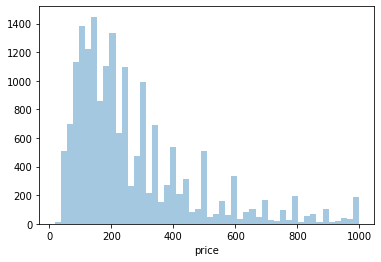

In [21]:
sns.distplot(df[df.price.between(0, np.quantile(df.price, .95))].price, kde=False)

In [22]:
np.quantile(df.price, [.1,.5,.9,.95])

array([ 84., 210., 701., 999.])

Após os filtros que foram realizados, podemos notar que 50% dos alugueis são até 210 reais, e 95% dos alugueis custam até 999 reais.

## Análise da distribuição

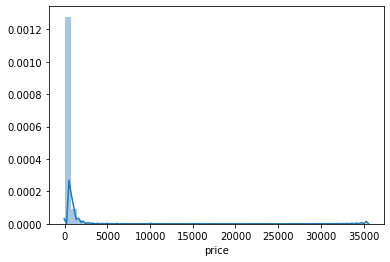

In [23]:
sns.distplot(df.price)

Mesmo removendo os alugueis sem review a distribuição da variável resposta é assimétrica(poucos valores muito altos), será utilizado a transformação logaritimica para minimizar esse efeito.

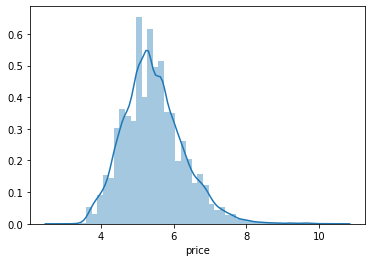

In [24]:
sns.distplot(np.log(df.price))

Agora a variável resposta possui distribuição mais atrativa para a análise de dados

In [25]:
df.price = np.log(df.price)

# Variáveis null

In [26]:
prop_nan = df.isna().mean().sort_values(ascending = False).head(25)
prop_nan

host_acceptance_rate            1.000000
experiences_offered             1.000000
neighbourhood_group_cleansed    1.000000
jurisdiction_names              1.000000
license                         0.999896
square_feet                     0.978428
weekly_price                    0.916271
monthly_price                   0.903317
notes                           0.570384
host_about                      0.436563
transit                         0.332567
security_deposit                0.328284
host_neighbourhood              0.297571
cleaning_fee                    0.191382
host_response_time              0.181301
host_response_rate              0.181301
review_scores_checkin           0.045704
review_scores_accuracy          0.045652
review_scores_location          0.045547
review_scores_value             0.045495
review_scores_communication     0.045390
review_scores_cleanliness       0.045390
review_scores_rating            0.044711
description                     0.016715
bathrooms       

Existem variáveis 100% nulas, além destas, as variáveis com mais de 50% de valores nulos serão desconsideradas da análise.

Também existem variáveis com relação ao preço semanal e mensal que já serão desconsideradas por conta do filtro anterior.

In [27]:
df = df.drop(columns=list(prop_nan[prop_nan >= .5].index))

Serão tratados depois

In [28]:
df.isna().mean().sort_values(ascending = False).head(15)

host_about                     0.436563
transit                        0.332567
security_deposit               0.328284
host_neighbourhood             0.297571
cleaning_fee                   0.191382
host_response_time             0.181301
host_response_rate             0.181301
review_scores_checkin          0.045704
review_scores_accuracy         0.045652
review_scores_location         0.045547
review_scores_value            0.045495
review_scores_communication    0.045390
review_scores_cleanliness      0.045390
review_scores_rating           0.044711
description                    0.016715
dtype: float64

Apartamentos sem banheiro, quartos ou camas serão desconsiderados

In [29]:
df = df[~(df.bedrooms.isna() | df.bathrooms.isna() | df.beds.isna())]

In [30]:
df.isna().mean().sort_values(ascending = False).head(15)

host_about                     0.436836
transit                        0.332217
security_deposit               0.328190
host_neighbourhood             0.297536
cleaning_fee                   0.191296
host_response_time             0.181357
host_response_rate             0.181357
review_scores_checkin          0.045718
review_scores_accuracy         0.045666
review_scores_location         0.045562
review_scores_value            0.045509
review_scores_communication    0.045405
review_scores_cleanliness      0.045405
review_scores_rating           0.044725
description                    0.016634
dtype: float64

In [31]:
review_cols = ['review_scores_checkin', 'review_scores_accuracy', 'review_scores_location', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_rating']

In [32]:
df[review_cols] = df[review_cols].fillna(0)

# Separar bases

Agora que foi terminado as transformações da variável resposta, vamos separar em treino e teste

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'price'), df.price, test_size=0.33, random_state=2108)

# Exploratória e Transformações

## Outras Variáveis de preço e rate

In [34]:
def percetn_to_numeric(value):
    return 0 if value is np.nan else float(value.replace('%', '').replace(',', ''))/100

In [35]:
tnc = TransformNewColumn({
    'security_deposit': 'security_deposit.apply(to_numeric).fillna(0)',
    'cleaning_fee': 'cleaning_fee.apply(to_numeric).fillna(0)',
    'extra_people': 'extra_people.apply(to_numeric).fillna(0)',
    'host_response_rate': 'host_response_rate.apply(percetn_to_numeric)'
})

In [36]:
X_train = tnc.transform(X_train, env = vars())
X_train[['security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate']].head(5)

,,security_deposit,cleaning_fee,extra_people,host_response_rate
id,host_id,,,,
18134491,95597326,2000.0,250.0,50.0,1.00
3374964,16655607,0.0,0.0,35.0,1.00
31263764,233935769,0.0,0.0,80.0,0.25
19539394,129908142,0.0,0.0,0.0,1.00
6306101,18676204,0.0,150.0,0.0,1.00


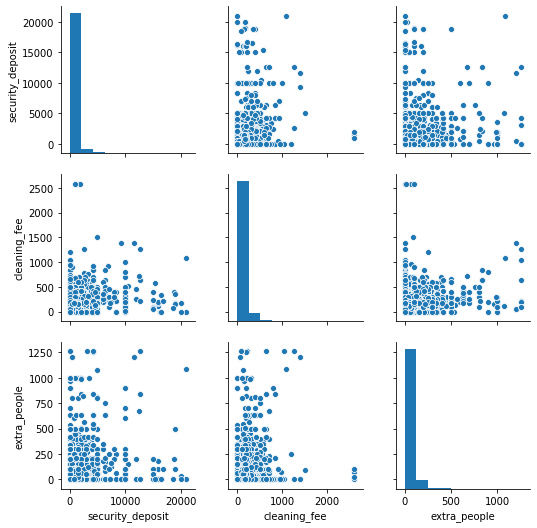

In [37]:
sns.pairplot(X_train[['security_deposit', 'cleaning_fee', 'extra_people']])

As variáveis possuem um comportamento parecido com a variável resposta, mas não serão transformados.

## Flags

Essa classe avalia as variáveis que possuem baixa variabilidade para serem removidas(95% de valores iguais), e cria novas variáveis com uma proporção acima de 50%

In [38]:
tb = TransformBinary()
tb.fit(X_train)

In [39]:
tb.cols_drop

['host_has_profile_pic',
 'bed_type',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'is_business_travel_ready',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [40]:
tb.cols_bin

['bin_host_is_superhost_f',
 'bin_host_identity_verified_f',
 'bin_is_location_exact_t',
 'bin_property_type_Apartment',
 'bin_room_type_Entire home/apt',
 'bin_instant_bookable_f']

In [41]:
df.bed_type.value_counts(normalize=True) # Será removido pela baixa variabilidade

Real Bed         0.987341
Pull-out Sofa    0.008840
Futon            0.002354
Airbed           0.000942
Couch            0.000523
Name: bed_type, dtype: float64

In [42]:
df.guests_included.value_counts(normalize=True) # Será criado uma nova variável para o primeiro valor

1     0.606005
2     0.192499
4     0.091018
3     0.038866
6     0.031333
5     0.020819
8     0.007062
7     0.005022
10    0.003714
12    0.001151
9     0.000889
11    0.000680
15    0.000366
16    0.000314
13    0.000209
14    0.000052
Name: guests_included, dtype: float64

In [43]:
X_train = tb.transform(X_train) #Poderia ser utilizado o fit_transform, mas foi utilizado separadamente para melhor explicação
X_train.head(3)

,,description,transit,host_since,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_instant_bookable_f
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18134491,95597326,"Apart localizado em Ipanema, a poucos metros d...",A Estação Nossa Senhora da Paz e General Osóri...,2016-09-17,Falar de nós mesmo soa falso....Corremos o ris...,within an hour,1.00,Ipanema,3.0,3.0,"['email', 'phone', 'facebook', 'google', 'revi...",Lagoa,-22.97875,-43.20397,8,2.0,2.0,4.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2000.0,250.0,1,50.0,7,1124,7,7,1125,1125,7.0,1125.0,a week ago,0,0,19,19,2,0,2018-03-30,2018-06-04,90.0,10.0,10.0,10.0,9.0,10.0,8.0,moderate,3,3,0,0,0.10,1,0,0,0,1,1
3374964,16655607,apartamento na,Metro estação Cinelandia e diversas linhas de ...,2014-06-11,NaN,within an hour,1.00,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Centro,-22.91252,-43.17933,5,1.0,2.0,3.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",0.0,0.0,4,35.0,2,99,2,2,99,99,2.0,99.0,today,21,35,56,216,71,14,2014-10-27,2019-11-17,92.0,10.0,9.0,10.0,10.0,10.0,10.0,moderate,2,2,0,0,1.15,1,0,0,1,1,0
31263764,233935769,"Quarto em condominio fechado com piscina, saun...",NaN,2019-01-02,NaN,a few days or more,0.25,Copacabana,1.0,1.0,"['phone', 'offline_government_id', 'selfie', '...",Copacabana,-22.96450,-43.19420,2,1.0,1.0,1.0,"{Wifi,Pool,Elevator,""Lock on bedroom door""}",0.0,0.0,1,80.0,1,30,1,1,30,30,1.0,30.0,11 months ago,30,59,89,364,1,1,2019-03-03,2019-03-03,60.0,10.0,6.0,10.0,10.0,10.0,6.0,strict_14_with_grace_period,1,0,1,0,0.11,1,1,1,0,0,1


## Transformações e novas colunas

### host_verifications

In [44]:
cnt_host_verifications = word_counts(X_train, 'host_verifications')
cnt_host_verifications

                       51131
phone                  12752
email                  12050
reviews                 9255
governmentid            7654
jumio                   6464
offlinegovernmentid     4264
facebook                3397
selfie                  2752
identitymanual          2455
workemail               1507
google                   896
manualoffline            343
kba                       86
manualonline              46
none                       7
sentid                     4
photographer               3
dtype: int64

In [45]:
(df.host_verifications.str.contains('phone')*1).value_counts(normalize= True)

1    0.99592
0    0.00408
Name: host_verifications, dtype: float64

Como telefone possui um alto indice de verificação, ele não será utilizado

In [46]:
(df.host_verifications.str.contains('manual_offline')*1).value_counts(normalize= True)

0    0.972433
1    0.027567
Name: host_verifications, dtype: float64

In [47]:
cnt_host_verifications[1:11]

phone                  12752
email                  12050
reviews                 9255
governmentid            7654
jumio                   6464
offlinegovernmentid     4264
facebook                3397
selfie                  2752
identitymanual          2455
workemail               1507
dtype: int64

In [48]:
var_host_verifications = []
for value in cnt_host_verifications[1:11].index:
    var_host_verifications.append('host_verifications_'+value)
    tnc.add({'host_verifications_'+value: 'host_verifications.str.contains("{}")*1'.format(value)})

In [49]:
tnc.mapping

{'security_deposit': 'security_deposit.apply(to_numeric).fillna(0)',
 'cleaning_fee': 'cleaning_fee.apply(to_numeric).fillna(0)',
 'extra_people': 'extra_people.apply(to_numeric).fillna(0)',
 'host_response_rate': 'host_response_rate.apply(percetn_to_numeric)',
 'host_verifications_phone': 'host_verifications.str.contains("phone")*1',
 'host_verifications_email': 'host_verifications.str.contains("email")*1',
 'host_verifications_reviews': 'host_verifications.str.contains("reviews")*1',
 'host_verifications_governmentid': 'host_verifications.str.contains("governmentid")*1',
 'host_verifications_jumio': 'host_verifications.str.contains("jumio")*1',
 'host_verifications_offlinegovernmentid': 'host_verifications.str.contains("offlinegovernmentid")*1',
 'host_verifications_facebook': 'host_verifications.str.contains("facebook")*1',
 'host_verifications_selfie': 'host_verifications.str.contains("selfie")*1',
 'host_verifications_identitymanual': 'host_verifications.str.contains("identitymanu

In [50]:
X_train = tnc.transform(X_train, var_host_verifications)

X_train.head(5)

,,description,transit,host_since,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_instant_bookable_f,host_verifications_phone,host_verifications_email,host_verifications_reviews,host_verifications_governmentid,host_verifications_jumio,host_verifications_offlinegovernmentid,host_verifications_facebook,host_verifications_selfie,host_verifications_identitymanual,host_verifications_workemail
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18134491,95597326,"Apart localizado em Ipanema, a poucos metros d...",A Estação Nossa Senhora da Paz e General Osóri...,2016-09-17,Falar de nós mesmo soa falso....Corremos o ris...,within an hour,1.00,Ipanema,3.0,3.0,"['email', 'phone', 'facebook', 'google', 'revi...",Lagoa,-22.97875,-43.20397,8,2.0,2.0,4.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2000.0,250.0,1,50.0,7,1124,7,7,1125,1125,7.0,1125.0,a week ago,0,0,19,19,2,0,2018-03-30,2018-06-04,90.0,10.0,10.0,10.0,9.0,10.0,8.0,moderate,3,3,0,0,0.10,1,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0
3374964,16655607,apartamento na,Metro estação Cinelandia e diversas linhas de ...,2014-06-11,NaN,within an hour,1.00,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Centro,-22.91252,-43.17933,5,1.0,2.0,3.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",0.0,0.0,4,35.0,2,99,2,2,99,99,2.0,99.0,today,21,35,56,216,71,14,2014-10-27,2019-11-17,92.0,10.0,9.0,10.0,10.0,10.0,10.0,moderate,2,2,0,0,1.15,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0
31263764,233935769,"Quarto em condominio fechado com piscina, saun...",NaN,2019-01-02,NaN,a few days or more,0.25,Copacabana,1.0,1.0,"['phone', 'offline_government_id', 'selfie', '...",Copacabana,-22.96450,-43.19420,2,1.0,1.0,1.0,"{Wifi,Pool,Elevator,""Lock on bedroom door""}",0.0,0.0,1,80.0,1,30,1,1,30,30,1.0,30.0,11 months ago,30,59,89,364,1,1,2019-03-03,2019-03-03,60.0,10.0,6.0,10.0,10.0,10.0,6.0,strict_14_with_grace_period,1,0,1,0,0.11,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0
19539394,129908142,Lindo apartamento duplo de 203 m2 com vista pa...,NaN,2017-05-11,"Hello, o Casa Mantik está entrando no Airbnb p...",within a few hours,1.00,Ipanema,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Ipanema,-22.98575,-43.20230,4,2.5,2.0,3.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Wheelc...",0.0,0.0,1,0.0,2,1125,2,2,1125,1125,2.0,1125.0,4 weeks ago,0,15,27,27,35,13,2017-07-31,2019-11-03,99.0,10.0,10.0,10.0,10.0,10.0,9.0,strict_14_with_grace_period,1,1,0,0,1.24,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0
6306101,18676204,"This is an excellent two-bedroom apartment, re...",Most of the international events that take pla...,2014-07-22,Professor of acting and theater director. Mot...,within a few hours,1.00,Leme,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Leme,-22.96315,-43.16740,4,2.5,2.0,3.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.0,150.0,3,0.0,3,1125,3,3,1125,1125,3.0,1125.0,2 months ago,30,49,79,354,5,1,2016-01-08,2019-01-03,88.0,9.0,

In [51]:
X_train = X_train.drop(columns=['host_verifications'])

### Texto aberto

In [52]:
var_obj = (X_train.select_dtypes('object').columns).to_list()
var_obj

['description',
 'transit',
 'host_about',
 'host_response_time',
 'host_neighbourhood',
 'neighbourhood_cleansed',
 'amenities',
 'calendar_updated',
 'cancellation_policy']

In [53]:
X_train[var_obj].head(3)

,,description,transit,host_about,host_response_time,host_neighbourhood,neighbourhood_cleansed,amenities,calendar_updated,cancellation_policy
id,host_id,,,,,,,,,
18134491,95597326,"Apart localizado em Ipanema, a poucos metros d...",A Estação Nossa Senhora da Paz e General Osóri...,Falar de nós mesmo soa falso....Corremos o ris...,within an hour,Ipanema,Lagoa,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",a week ago,moderate
3374964,16655607,apartamento na,Metro estação Cinelandia e diversas linhas de ...,NaN,within an hour,NaN,Centro,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",today,moderate
31263764,233935769,"Quarto em condominio fechado com piscina, saun...",NaN,NaN,a few days or more,Copacabana,Copacabana,"{Wifi,Pool,Elevator,""Lock on bedroom door""}",11 months ago,strict_14_with_grace_period


In [54]:
var_obj

for col in var_obj:
    tnc.add({col: '{}.str.lower()'.format(col)})

In [55]:
tnc.mapping

{'security_deposit': 'security_deposit.apply(to_numeric).fillna(0)',
 'cleaning_fee': 'cleaning_fee.apply(to_numeric).fillna(0)',
 'extra_people': 'extra_people.apply(to_numeric).fillna(0)',
 'host_response_rate': 'host_response_rate.apply(percetn_to_numeric)',
 'host_verifications_phone': 'host_verifications.str.contains("phone")*1',
 'host_verifications_email': 'host_verifications.str.contains("email")*1',
 'host_verifications_reviews': 'host_verifications.str.contains("reviews")*1',
 'host_verifications_governmentid': 'host_verifications.str.contains("governmentid")*1',
 'host_verifications_jumio': 'host_verifications.str.contains("jumio")*1',
 'host_verifications_offlinegovernmentid': 'host_verifications.str.contains("offlinegovernmentid")*1',
 'host_verifications_facebook': 'host_verifications.str.contains("facebook")*1',
 'host_verifications_selfie': 'host_verifications.str.contains("selfie")*1',
 'host_verifications_identitymanual': 'host_verifications.str.contains("identitymanu

In [56]:
X_train = tnc.transform(X_train, cols = var_obj)
X_train[var_obj].head(3)

,,description,transit,host_about,host_response_time,host_neighbourhood,neighbourhood_cleansed,amenities,calendar_updated,cancellation_policy
id,host_id,,,,,,,,,
18134491,95597326,"apart localizado em ipanema, a poucos metros d...",a estação nossa senhora da paz e general osóri...,falar de nós mesmo soa falso....corremos o ris...,within an hour,ipanema,lagoa,"{tv,""cable tv"",internet,wifi,""air conditioning...",a week ago,moderate
3374964,16655607,apartamento na,metro estação cinelandia e diversas linhas de ...,NaN,within an hour,NaN,centro,"{tv,wifi,""air conditioning"",kitchen,""paid park...",today,moderate
31263764,233935769,"quarto em condominio fechado com piscina, saun...",NaN,NaN,a few days or more,copacabana,copacabana,"{wifi,pool,elevator,""lock on bedroom door""}",11 months ago,strict_14_with_grace_period


Será utilizado a pacote nltk para remover stopwords

In [57]:
from nltk.corpus import stopwords
stop = stopwords.words('english') + stopwords.words('portuguese') + ['"', '\'', '', ',', '-', '.', 'rio', 'O' ,'1', '2', '3', '4', '5']

#### description

In [58]:
word_counts(X_train,'description', stop).head(30)

apartamento     8881
copacabana      7923
praia           7549
apartment       7134
tv              6226
beach           5763
room            5558
quarto          4989
sala            4760
cama            4685
ipanema         4679
cozinha         4670
metr            4483
wifi            4372
prximo          4291
restaurantes    4157
bed             3709
bairro          3584
kitchen         3580
janeiro         3572
bem             3483
acesso          3382
ar              3176
barra           3165
restaurants     2973
h               2942
located         2940
one             2907
espao           2886
metro           2849
dtype: int64

In [59]:
(X_train.description.str.contains('praia|beach',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

1    0.67778
0    0.32222
Name: description, dtype: float64

In [60]:
(X_train.description.str.contains('bar|pub',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

1    0.500625
0    0.499375
Name: description, dtype: float64

In [61]:
desc = ['praia|beach', 'shopping', 'restaurant', 'bar|pub']
var_desc= []

for value in desc:
    _ = tnc.add({'fl_'+value: 'description.str.contains("{}", regex=True).fillna(0).astype(int)'.format(value)})
    var_desc += _

In [62]:
var_desc

['fl_praia|beach', 'fl_shopping', 'fl_restaurant', 'fl_bar|pub']

In [63]:
X_train = tnc.transform(X_train, var_desc)
X_train[var_desc].head(5)

,,fl_praia|beach,fl_shopping,fl_restaurant,fl_bar|pub
id,host_id,,,,
18134491,95597326,1,0,1,0
3374964,16655607,0,0,0,0
31263764,233935769,1,0,0,0
19539394,129908142,0,0,1,0
6306101,18676204,1,0,0,1


In [64]:
X_train = X_train.drop(columns=['description'])

#### transit

In [65]:
word_counts(X_train,'transit', stop).head(30)

nibus          3822
metr           3307
bus            2305
metro          2164
taxi           1984
estao          1902
station        1612
minutos        1608
uber           1571
copacabana     1472
subway         1415
brt            1273
transporte     1238
min            1204
minutes        1203
prximo         1118
cidade         1109
ponto          1067
fica           1054
acesso         1054
txi            1040
ipanema        1021
rua             990
apartamento     966
pontos          961
h               941
km              935
frente          875
aeroporto       790
city            780
dtype: int64

In [66]:
(X_train.transit.str.contains('.nibus|bus',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.538492
1    0.461508
Name: transit, dtype: float64

In [67]:
(X_train.transit.str.contains('aeroporto|airport',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.908729
1    0.091271
Name: transit, dtype: float64

In [68]:
transit = ['.nibus|bus', 'metr.|subway', 't.xi', 'brt', 'aeroporto|airport']
var_transit = []

for value in transit:
    _ = tnc.add({'fl_'+value: 'transit.str.contains("{}", regex=True).fillna(0).astype(int)'.format(value)})
    var_transit += _

In [69]:
var_transit

['fl_.nibus|bus',
 'fl_metr.|subway',
 'fl_t.xi',
 'fl_brt',
 'fl_aeroporto|airport']

In [70]:
X_train = tnc.transform(X_train, var_transit)
X_train[var_transit].head(5)

,,fl_.nibus|bus,fl_metr.|subway,fl_t.xi,fl_brt,fl_aeroporto|airport
id,host_id,,,,,
18134491,95597326,0,1,0,0,0
3374964,16655607,1,1,1,0,1
31263764,233935769,0,0,0,0,0
19539394,129908142,0,0,0,0,0
6306101,18676204,0,0,0,0,0


In [71]:
X_train = X_train.drop(columns=['transit'])

#### host_about

In [72]:
word_counts(X_train,'host_about', stop).head(30)

janeiro         2836
pessoas         1833
viajar          1662
gosto           1661
cidade          1549
love            1458
conhecer        1371
anos            1347
bem             1339
carioca         1243
adoro           1240
casa            1208
receber         1142
airbnb          1141
im              1046
people           980
sempre           963
vida             953
hspedes          885
apartamento      843
amigos           841
fazer            819
tambm            794
like             779
new              752
voc              744
city             738
ser              735
apartamentos     723
years            709
dtype: int64

In [73]:
(X_train.host_about.str.contains('viaj',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.8458
1    0.1542
Name: host_about, dtype: float64

In [74]:
(X_train.host_about.str.contains('conhe',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.880934
1    0.119066
Name: host_about, dtype: float64

In [75]:
(X_train.host_about.str.contains('receb',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.891708
1    0.108292
Name: host_about, dtype: float64

In [76]:
host_about = ['receb', 'conhe']
var_host_about = []

for value in host_about:
    _ = tnc.add({'fl_'+value: 'host_about.str.contains("{}", regex=True).fillna(0).astype(int)'.format(value)})
    var_host_about += _

In [77]:
X_train = tnc.transform(X_train, var_host_about)
X_train[var_host_about].head(5)

,,fl_receb,fl_conhe
id,host_id,,
18134491,95597326,0,1
3374964,16655607,0,0
31263764,233935769,0,0
19539394,129908142,0,1
6306101,18676204,0,0


In [78]:
X_train = X_train.drop(columns=['host_about'])

#### amenities

In [79]:
word_counts(X_train,'amenities', stop).head(30)

tv              16960
friendly        14098
allowed         13840
wifi            12264
kitchen         11880
essentials      11810
air             10560
conditioning    10560
elevator         9897
hangers          9701
parking          9473
iron             8912
washer           8391
dryer            8222
hot              8138
laptop           8034
workspace        8034
entrance         7430
water            7264
premises         7064
bed              6991
free             6572
familykid        6064
cable            6032
hair             5962
steps            5434
stairs           5434
enter            5434
refrigerator     5277
wide             5177
dtype: int64

In [80]:
(X_train.amenities.str.contains('internet',regex = True).fillna(0).astype(int)).value_counts(normalize= True)

0    0.674813
1    0.325187
Name: amenities, dtype: float64

In [81]:
amenities = ['friendly', 'parking', 'tv', 'laptop', 'pillows', 'pool', 'kitchen']
var_amenities = []

for value in amenities:
    _ = tnc.add({'fl_'+value: 'amenities.str.contains("{}", regex=True).fillna(0).astype(int)'.format(value)})
    var_amenities += _

In [82]:
X_train = tnc.transform(X_train, var_amenities)
X_train[var_amenities].head(5)

,,fl_friendly,fl_parking,fl_tv,fl_laptop,fl_pillows,fl_pool,fl_kitchen
id,host_id,,,,,,,
18134491,95597326,1,1,1,1,1,1,1
3374964,16655607,1,1,1,1,0,0,1
31263764,233935769,0,0,0,0,0,1,0
19539394,129908142,1,1,1,1,1,1,1
6306101,18676204,1,1,1,0,0,0,1


In [83]:
X_train = X_train.drop(columns=['amenities'])

## Colunas ordinais

In [84]:
df.host_neighbourhood.value_counts()

Copacabana          4616
Ipanema             1614
Barra da Tijuca     1464
Leblon               740
Botafogo             734
                    ... 
Parada de Lucas        1
Sion                   1
Vila Clementino        1
Prenzlauer Berg        1
Coração de Jesus       1
Name: host_neighbourhood, Length: 136, dtype: int64

In [85]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    9183
flexible                       5501
moderate                       4066
super_strict_60                 255
super_strict_30                 110
strict                            2
Name: cancellation_policy, dtype: int64

In [86]:
df.host_response_time.value_counts(dropna=False)

within an hour        7020
within a few hours    4526
NaN                   3467
within a day          3322
a few days or more     782
Name: host_response_time, dtype: int64

In [87]:
df.calendar_updated.value_counts(dropna=False).sort_index()

1 week ago        200
10 months ago     323
11 months ago     256
12 months ago     191
13 months ago      85
                 ... 
9 months ago      338
a week ago       1308
never              33
today            1666
yesterday         821
Name: calendar_updated, Length: 83, dtype: int64

In [88]:
def group_calendar(value):
    if 'day' in value:
        return 'days'
    if 'week' in value:
        return 'weeks'
    elif 'month' in value:
        return 'months'
    else:
        return value

In [89]:
tnc.add({
    'calendar_updated': 'calendar_updated.apply(group_calendar)'
})

['calendar_updated']

In [90]:
X_train = tnc.transform(X_train, ['calendar_updated'], vars())

In [91]:
X_train.calendar_updated.value_counts(dropna=False)

months    5124
weeks     4562
days      3099
never       23
Name: calendar_updated, dtype: int64

In [92]:
ordinal = {
    'host_response_time': ['within an hour', 'within a few hours', 'within a day', 'a few days or more', 'NAN'],
    'cancellation_policy': ['flexible', 'moderate', 'strict_14_with_grace_period', 'strict', 'super_strict_30', 'super_strict_60'], #https://www.airbnb.com.br/home/cancellation_policies
    'calendar_updated': ['days', 'weeks', 'months', 'never']
}

In [93]:
oe = OrdinalEncoder(ordinal)

In [94]:
X_train = oe.transform(X_train)
X_train[['host_response_time', 'cancellation_policy', 'calendar_updated']]

,,host_response_time,cancellation_policy,calendar_updated
id,host_id,,,
18134491,95597326,0,1,1
3374964,16655607,0,1,0
31263764,233935769,3,2,2
19539394,129908142,1,2,1
6306101,18676204,1,2,2
...,...,...,...,...
33494902,80111383,0,2,0
23309188,46024577,2,0,1
2384727,12180348,1,0,2


In [95]:
X_train.dtypes[X_train.dtypes == 'object']

host_neighbourhood        object
neighbourhood_cleansed    object
dtype: object

## Coluna de datas

In [96]:
var_dates = tnc.add(
    {
        'diff_last_first_review': '(last_review - first_review).dt.days.fillna(0)',
        'diff_first_review_host_since': '(first_review - host_since).dt.days.fillna(0)',
        'host_since': '(pd.to_datetime("18-01-2020") - host_since).dt.days.fillna(0)',
        'first_review': '(pd.to_datetime("18-01-2020") - first_review).dt.days.fillna(0)',
        'last_review': '(pd.to_datetime("18-01-2020") - last_review).dt.days.fillna(0)'
    }
)

In [97]:
X_train = tnc.transform(X_train, var_dates, locals())
X_train[var_dates].head(3)

,,diff_last_first_review,diff_first_review_host_since,host_since,first_review,last_review
id,host_id,,,,,
18134491,95597326,66,559.0,1218.0,659,593
3374964,16655607,1847,138.0,2047.0,1909,62
31263764,233935769,0,60.0,381.0,321,321


Essa classe precisa ser melhorada.

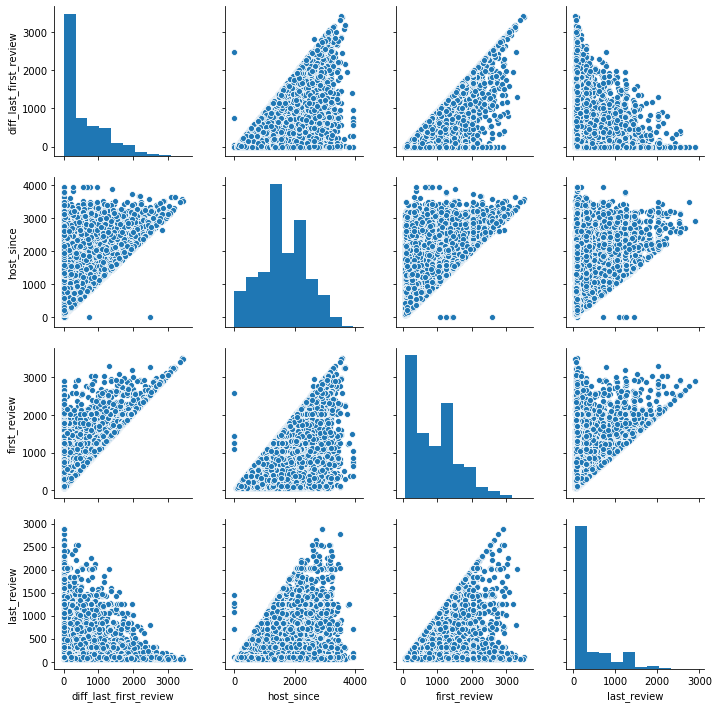

In [98]:
sns.pairplot(X_train[['diff_last_first_review', 'host_since', 'first_review', 'last_review']])

## Colunas categóricas esparsas

In [99]:
X_train.select_dtypes('object').head(3)

,,host_neighbourhood,neighbourhood_cleansed
id,host_id,,
18134491,95597326,ipanema,lagoa
3374964,16655607,NaN,centro
31263764,233935769,copacabana,copacabana


In [100]:
X_train.host_neighbourhood.value_counts(dropna=False, normalize=True).head(25)

NaN                         0.296455
copacabana                  0.240475
ipanema                     0.085337
barra da tijuca             0.077686
botafogo                    0.038804
leblon                      0.038413
flamengo                    0.026858
recreio dos bandeirantes    0.025453
santa teresa                0.022876
lapa                        0.017723
leme                        0.014522
laranjeiras                 0.012492
tijuca                      0.010462
glória                      0.008745
catete                      0.007495
centro                      0.006949
gávea                       0.006558
lagoa                       0.006090
humaitá                     0.005309
jardim botânico             0.004997
vidigal                     0.004528
maracanã                    0.003435
são conrado                 0.003357
vila isabel                 0.003201
são cristóvão               0.002420
Name: host_neighbourhood, dtype: float64

Será utilizado a variável `neighbourhood_cleansed` por ser melhor preenchido, além disto, será utilizada como baseline para o modelo

In [101]:
X_train = X_train.drop(columns = 'host_neighbourhood')

In [102]:
X_train.neighbourhood_cleansed.value_counts(dropna=False).head(30)

copacabana                  3864
barra da tijuca             1396
ipanema                     1359
jacarepaguá                  693
leblon                       669
botafogo                     668
recreio dos bandeirantes     471
santa teresa                 418
flamengo                     389
centro                       357
leme                         231
laranjeiras                  220
tijuca                       174
glória                       158
catete                       129
gávea                        124
lagoa                        118
camorim                      108
jardim botânico               96
humaitá                       84
maracanã                      68
são conrado                   65
vidigal                       51
freguesia (jacarepaguá)       48
vila isabel                   46
urca                          39
itanhangá                     36
são cristóvão                 36
taquara                       35
vargem pequena                35
Name: neig

### Baseline

In [103]:
df_bairro = pd.concat([X_train['neighbourhood_cleansed'], np.exp(y_train)], axis=1, sort=False).groupby('neighbourhood_cleansed').mean().reset_index()
df_bairro

,neighbourhood_cleansed,price
0,alto da boa vista,1011.416667
1,anchieta,126.000000
2,andaraí,93.533333
3,anil,189.000000
4,bangu,109.000000
...,...,...
119,vidigal,220.666667
120,vila da penha,102.333333
121,vila isabel,148.217391
122,vila valqueire,109.250000


In [104]:
def predict_baseline(bairro):
    if bairro in df_bairro.neighbourhood_cleansed.values:
        return df_bairro.loc[df_bairro.neighbourhood_cleansed == bairro, 'price'].values[0]
    else:
        return np.exp(y_train.mean()) 

In [105]:
y_test_baseline = X_test.neighbourhood_cleansed.str.lower().apply(predict_baseline)
y_test_baseline

id        host_id  
17596191  2952644      215.607595
37188332  279917377    320.932059
489917    132230       363.312371
19164455  2942002      363.312371
28584779  211819616    320.932059
                          ...    
2119162   2350927      363.312371
39232793  301149907    244.173653
30101275  226173411    363.312371
21416437  51995922     380.835498
31823339  238493281    244.173653
Name: neighbourhood_cleansed, Length: 6309, dtype: float64

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
def mape(y_true, y_pred):
    ape = np.abs((y_true - y_pred)/y_true)
    return np.mean(ape)

In [108]:
mean_squared_error(np.exp(y_test), y_test_baseline)

1440933.684404622

In [109]:
mape(np.exp(y_test), y_test_baseline)

1.3683691184990139

### Target Encoder

In [110]:
from category_encoders import TargetEncoder

In [111]:
import category_encoders as ce

In [112]:
ce.__file__

'/home/dobraga/anaconda3/lib/python3.7/site-packages/category_encoders/__init__.py'

In [113]:
te = TargetEncoder(cols=['neighbourhood_cleansed'])
te.fit(X_train, y_train)

TargetEncoder(cols=['neighbourhood_cleansed'], drop_invariant=False,
              handle_missing='value', handle_unknown='value',
              min_samples_leaf=1, return_df=True, smoothing=1.0, verbose=0)

In [114]:
X_train = te.transform(X_train)
X_train.head(5)

,,host_since,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_instant_bookable_f,host_verifications_phone,host_verifications_email,host_verifications_reviews,host_verifications_governmentid,host_verifications_jumio,host_verifications_offlinegovernmentid,host_verifications_facebook,host_verifications_selfie,host_verifications_identitymanual,host_verifications_workemail,fl_praia|beach,fl_shopping,fl_restaurant,fl_bar|pub,fl_.nibus|bus,fl_metr.|subway,fl_t.xi,fl_brt,fl_aeroporto|airport,fl_receb,fl_conhe,fl_friendly,fl_parking,fl_tv,fl_laptop,fl_pillows,fl_pool,fl_kitchen,diff_last_first_review,diff_first_review_host_since
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18134491,95597326,1218.0,0,1.00,3.0,3.0,5.779476,-22.97875,-43.20397,8,2.0,2.0,4.0,2000.0,250.0,1,50.0,7,1124,7,7,1125,1125,7.0,1125.0,1,0,0,19,19,2,0,659,593,90.0,10.0,10.0,10.0,9.0,10.0,8.0,1,3,3,0,0,0.10,1,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,66,559.0
3374964,16655607,2047.0,0,1.00,2.0,2.0,4.845377,-22.91252,-43.17933,5,1.0,2.0,3.0,0.0,0.0,4,35.0,2,99,2,2,99,99,2.0,99.0,0,21,35,56,216,71,14,1909,62,92.0,10.0,9.0,10.0,10.0,10.0,10.0,1,2,2,0,0,1.15,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1847,138.0
31263764,233935769,381.0,3,0.25,1.0,1.0,5.463272,-22.96450,-43.19420,2,1.0,1.0,1.0,0.0,0.0,1,80.0,1,30,1,1,30,30,1.0,30.0,2,30,59,89,364,1,1,321,321,60.0,10.0,6.0,10.0,10.0,10.0,6.0,2,1,0,1,0,0.11,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0
19539394,129908142,982.0,1,1.00,6.0,6.0,5.820632,-22.98575,-43.20230,4,2.5,2.0,3.0,0.0,0.0,1,0.0,2,1125,2,2,1125,1125,2.0,1125.0,1,0,15,27,27,35,13,901,76,99.0,10.0,10.0,10.0,10.0,10.0,9.0,2,1,1,0,0,1.24,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,825,81.0
6306101,18676204,2006.0,1,1.00,1.0,1.0,5.425063,-22.96315,-43.16740,4,2.5,2.0,3.0,0.0,150.0,3,0.0,3,1125,3,3,1125,1125,3.0,1125.0,2,30,49,79,354,5,1,1471,380,88.0,9.0,9.0,10.0,10.0,9.0,9.0,2,1,1,0,0,0.11,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1091,535.0


## Latitude e Longitude

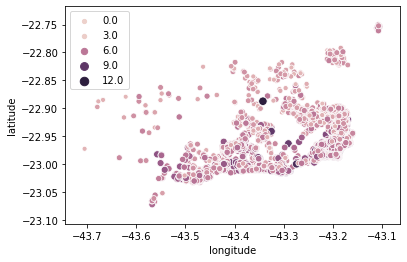

In [115]:
sns.scatterplot(x="longitude", y="latitude",
                hue=y_train.values, size=y_train.values,
                data=X_train)

In [116]:
pd.concat([X_train[['latitude', 'longitude']], y_train], axis=1, sort=False).corr()

,latitude,longitude,price
latitude,1.000000,0.390862,-0.310999
longitude,0.390862,1.000000,-0.060739
price,-0.310999,-0.060739,1.000000


A relação entre o preço e a latitude é negativa, como esperado, na baixas latitudes ficam a zona sul, barra da tijuca e recreio. A longitude também apresenta uma relação negativa, porém mais fraca.

# Multicolinearidade

In [117]:
corr = Corr(pd.concat([X_train, y_train], axis=1, sort=False))

In [118]:
corr.df_corr

,var1,var2,corr
0,host_listings_count,host_total_listings_count,1.000000
1,maximum_maximum_nights,maximum_nights_avg_ntm,0.999903
2,maximum_nights_avg_ntm,minimum_maximum_nights,0.999092
3,maximum_maximum_nights,minimum_maximum_nights,0.998848
4,minimum_minimum_nights,minimum_nights_avg_ntm,0.997449
...,...,...,...
3076,availability_60,minimum_nights_avg_ntm,0.000085
3077,accommodates,host_verifications_phone,0.000068
3078,bin_property_type_Apartment,review_scores_accuracy,0.000029
3079,bin_is_location_exact_t,fl_conhe,-0.000006


Agora serão avaliados as variáveis que possuem correlação acima de 0.90 e será avaliado aquela que possuir menor correlação com a variável resposta para ser excluido

In [119]:
drop_cor = corr.lowest_correlation('price')
drop_cor

['review_scores_checkin',
 'review_scores_rating',
 'minimum_nights',
 'review_scores_location',
 'minimum_nights_avg_ntm',
 'host_total_listings_count',
 'maximum_maximum_nights',
 'maximum_nights_avg_ntm',
 'minimum_maximum_nights',
 'review_scores_communication',
 'maximum_minimum_nights',
 'calculated_host_listings_count',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'host_listings_count',
 'availability_90',
 'availability_60']

In [120]:
corr.df_corr.head(25)

,var1,var2,corr,lowest_correlation_price
0,host_listings_count,host_total_listings_count,1.000000,host_total_listings_count
1,maximum_maximum_nights,maximum_nights_avg_ntm,0.999903,maximum_maximum_nights
2,maximum_nights_avg_ntm,minimum_maximum_nights,0.999092,maximum_nights_avg_ntm
3,maximum_maximum_nights,minimum_maximum_nights,0.998848,maximum_maximum_nights
4,minimum_minimum_nights,minimum_nights_avg_ntm,0.997449,minimum_nights_avg_ntm
5,calculated_host_listings_count,calculated_host_listings_count_entire_homes,0.993714,calculated_host_listings_count
6,maximum_maximum_nights,maximum_nights,0.985719,maximum_maximum_nights
7,maximum_nights,maximum_nights_avg_ntm,0.985632,maximum_nights_avg_ntm
8,maximum_nights,minimum_maximum_nights,0.984789,minimum_maximum_nights
9,calculated_host_listings_count,host_listings_count,0.974406,calculated_host_listings_count


In [121]:
#df = df.drop(columns=drop_cor)

# Variáveis null

In [122]:
X_train.isna().mean().sort_values(ascending = False)[:3]

host_listings_count             0.000547
host_total_listings_count       0.000547
diff_first_review_host_since    0.000000
dtype: float64

In [123]:
var_null = tnc.add({
    'host_listings_count': 'host_listings_count.fillna(0)',
    'host_total_listings_count': 'host_total_listings_count.fillna(0)'
})

In [124]:
X_train = tnc.transform(X_train, var_null)

# Pipeline

In [125]:
import inspect

In [126]:
pipeline = [tnc, tb, oe]

for pipe in pipeline:
    if 'env' in inspect.getfullargspec(pipe.transform).args:
        X_test = pipe.transform(X_test, env=vars())
    else:
        X_test = pipe.transform(X_test)

In [127]:
X_test = X_test[X_train.columns]
X_test = te.transform(X_test)

X_test.head(5)

,,host_since,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bin_host_is_superhost_f,bin_host_identity_verified_f,bin_is_location_exact_t,bin_property_type_Apartment,bin_room_type_Entire home/apt,bin_instant_bookable_f,host_verifications_phone,host_verifications_email,host_verifications_reviews,host_verifications_governmentid,host_verifications_jumio,host_verifications_offlinegovernmentid,host_verifications_facebook,host_verifications_selfie,host_verifications_identitymanual,host_verifications_workemail,fl_praia|beach,fl_shopping,fl_restaurant,fl_bar|pub,fl_.nibus|bus,fl_metr.|subway,fl_t.xi,fl_brt,fl_aeroporto|airport,fl_receb,fl_conhe,fl_friendly,fl_parking,fl_tv,fl_laptop,fl_pillows,fl_pool,fl_kitchen,diff_last_first_review,diff_first_review_host_since
id,host_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17596191,2952644,2742.0,2,1.0,1.0,1.0,5.062698,-22.92120,-43.16955,4,2.0,2.0,3.0,4198.0,420.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,2,30,60,90,365,2,0,958,741,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1,1,0,0,0.07,1,0,0,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,217,1784.0
37188332,279917377,174.0,1,1.0,1.0,1.0,5.460449,-23.02656,-43.46324,9,4.5,4.0,8.0,0.0,0.0,9,120.0,3,60,3,3,60,60,3.0,60.0,1,22,52,82,82,2,2,111,103,90.0,9.0,8.0,10.0,10.0,10.0,9.0,2,1,1,0,0,1.09,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,63.0
489917,132230,3525.0,0,1.0,6.0,6.0,5.463272,-22.98238,-43.19156,2,1.0,1.0,2.0,0.0,0.0,1,46.0,14,365,14,14,365,365,14.0,365.0,1,0,0,0,0,21,2,2588,101,91.0,9.0,8.0,9.0,9.0,9.0,8.0,2,6,6,0,0,0.25,0,0,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2487,937.0
19164455,2942002,2743.0,1,0.9,2.0,2.0,5.463272,-22.98188,-43.19236,2,1.0,1.0,1.0,0.0,60.0,2,65.0,3,1125,3,3,1125,1125,3.0,1125.0,1,0,0,14,289,16,8,850,62,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2,2,0,2,0,0.60,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,788,1893.0
28584779,211819616,510.0,0,1.0,7.0,7.0,5.460449,-23.01539,-43.47443,7,2.0,3.0,3.0,0.0,0.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,2,0,0,19,109,2,1,462,382,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2,7,1,6,0,0.15,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,80,48.0


# Modelagem

Como sera utilizado apenas um modelo baseado em árvores de descisão, não será nescessário alterar a escala das variáveis.

In [128]:
from dstools.model import EvalModels
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

Serão utilizados 5 partições, onde para cada partição será realizada o treinamento do modelo e no restante da base será realizado o teste do modelo para melhor avaliação do modelo.

In [129]:
eva = EvalModels(X_train, y_train, X_test, y_test)

Será utilizado um modelo ensemble que tem como base o algoritmo bagging, que simplificando, utiliza a agregação de diversas árvores de decisão para cada uma dessas árvores utiliza a técnica de bootstrap tanto nas colunas quanto nas linhas.

In [130]:
_ = eva.eval_models({
    'lr': LinearRegression(),
    'rfr': RandomForestRegressor(),
    'gbr': HistGradientBoostingRegressor(),
    'lgbr': LGBMRegressor()
})

Score for lr model 0.3189 (0.0231)
Score for rfr model 0.2577 (0.0191)
Score for gbr model 0.2274 (0.0204)
Score for lgbr model 0.2276 (0.0198)


## Otimização dos hiperparâmetros

O sklearn já possui métodos internos para definição desses hiperparâmetros automaticamente, agora serão testados outros.

In [131]:
import skopt
from skopt import gp_minimize
from skopt.utils import use_named_args
from skopt.space import Real, Integer
from skopt.plots import plot_convergence, plot_regret, plot_objective

Para isto, será utilizado a optimização bayesiana que tem os processos gaussianos como distribuição apriori.

No início do processo são testados alguns pontos aleatoriamente que são utilizado para o calculo da distribuição a posteriori, após isso, começa o loop de tentativa de combinações e calculo da posteriori com este novo ponto.

A seleção do ponto que será testado, normalmente, é dado pelos valores do intervalo de credibilidade com valores mais interessantes(maiores ou menores).

In [132]:
reg = LGBMRegressor()

In [133]:
SPACE = [
    Real(0.001, 1,    name='learning_rate'),
    Real(0, 1,        name='reg_alpha'),
    Real(0, 1,        name='reg_lambda'),
    Integer(2, 60,    name='min_samples_leaf'),
    Integer(2, 128, name='num_leaves'),
    Integer(1, 100, name='min_child_samples'),
    Real(0.05, 1.0, name='subsample'),
    Real(0.1, 1.0,  name='colsample bytree')

]

Aqui não será utilizado o método anterior por ser mais demorado que o normal, além disto, o random forest para esta base de dados se mostrou estável(mse com pouca variabilidade).

In [166]:
@use_named_args(SPACE)
def objective(**params):
    reg.set_params(**params)
    reg.fit(X_train, y_train)
    
    pred = reg.predict(X_test)

    mse = mean_squared_error(pred, y_test)
    print('{:.4f}'.format(mse), end=' ')
    
    return mse

In [179]:
import warnings
warnings.filterwarnings("ignore")

res_gp = gp_minimize(objective, SPACE, n_calls=500, random_state=0, verbose=False)

"Best score=%.4f" % res_gp.fun

0.3341 0.2429 0.2563 0.3248 0.2576 0.3679 0.3252 0.2911 0.4079 0.2670 0.6607 0.6607 0.4644 0.2866 0.2680 0.2589 0.2468 0.2741 0.2735 0.6600 0.2374 0.2766 0.2431 0.2399 0.2375 0.2380 0.2400 0.2792 0.2725 0.2432 0.2364 0.2420 0.2385 0.2559 0.3016 0.2342 0.3457 0.2760 0.6445 0.4771 0.2629 0.3378 0.2825 0.2461 0.2636 0.2866 0.2398 0.2367 0.2579 0.2460 0.2772 0.2739 0.2626 0.2859 0.2767 0.2779 0.2401 0.3127 0.3252 0.2711 0.3501 0.2715 0.2358 0.2732 0.2384 0.2420 0.2793 0.2748 0.2752 0.2433 0.2799 0.2826 0.2359 0.2462 0.2627 0.2403 0.2360 0.2372 0.2740 0.2750 0.2827 0.2747 0.2383 0.2386 0.2369 0.2540 0.2411 0.2402 0.2361 0.2352 0.2374 0.2552 0.2345 0.2546 0.2369 0.2441 0.2362 0.2370 0.2361 0.2756 0.2397 0.2723 0.2358 0.2334 0.3156 0.2358 0.2352 0.2357 0.2350 0.2366 0.3036 0.2356 0.2390 0.2649 0.2363 0.2342 0.2880 0.2353 0.2348 0.2429 0.2381 0.2372 0.2710 0.2355 0.4518 0.2355 0.2370 0.2379 0.2364 0.2387 0.2389 0.2360 0.2372 0.2362 0.2369 0.2354 0.2368 0.2378 0.2356 0.2365 0.2365 0.2340 0.2352

'Best score=0.2327'

In [183]:
print("""Best parameters:
- learning_rate=%.6f
- reg_alpha=%.6f
- reg_lambda=%.6f
- min_samples_leaf=%d
- num_leaves=%d
- min_child_samples=%d
- subsample=%.6f
- colsample_bytree=%.6f
""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3], res_gp.x[4], res_gp.x[5], res_gp.x[6], res_gp.x[7]))

Best parameters:
- learning_rate=0.153601
- reg_alpha=1.000000
- reg_lambda=0.000000
- min_samples_leaf=60
- num_leaves=62
- min_child_samples=60
- subsample=0.200779
- colsample_bytree=1.000000



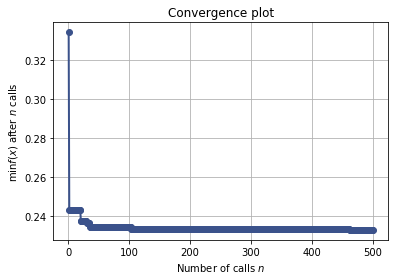

In [184]:
plot_convergence(res_gp)

## Modelo Final

Para o modelo final serão aleatorizados 49 features para a criação de 171 árvores de decisão e terão no máximo uma profundidade de 19

In [187]:
res_gp.x

[0.15360074045733682, 1.0, 0.0, 60, 62, 60, 0.20077936618078618, 1.0]

In [196]:
reg.set_params(**{'learning_rate': 0.15, 'reg_alpha': 1, 'reg_lambda': 0, 'min_samples_leaf': 60, 'num_leaves': 62, 'min_child_samples': 60, 'subsample': 0.2, 'colsample_bytree': 1})

reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample bytree=0.1,
              colsample_bytree=1, importance_type='split', learning_rate=0.15,
              max_depth=-1, min_child_samples=60, min_child_weight=0.001,
              min_samples_leaf=60, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=62, objective=None, random_state=None,
              reg_alpha=1, reg_lambda=0, silent=True, subsample=0.2,
              subsample_for_bin=200000, subsample_freq=0)

In [197]:
y_test_model = np.exp(reg.predict(X_test))

In [198]:
mean_squared_error(np.exp(y_test), y_test_model)

672068.2258111209

In [199]:
mape(np.exp(y_test), y_test_model)

0.352931409847935

In [200]:
_ = eva.eval('gbr_bo', reg)

Score for gbr_bo model 0.2296 (0.0194)


Conseguimos reduzir o erro e a variabilidade dentro dos folds

## Avaliação

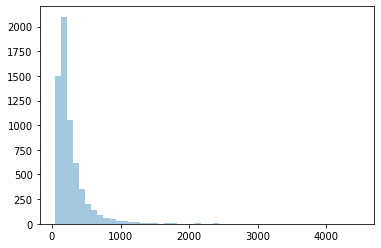

In [208]:
sns.distplot(np.exp(reg.predict(X_test)), kde=False)

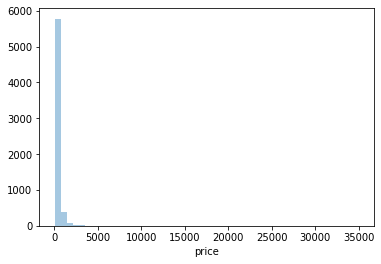

In [209]:
sns.distplot(np.exp(y_test), kde=False)

In [210]:
test = pd.DataFrame({
    'Preço Original': np.exp(y_test),
    'Fit Model Teste': np.exp(reg.predict(X_test)),
    'Error Model Teste': np.exp(y_test) - np.exp(reg.predict(X_test))
    
})

test.head(3)

,,Preço Original,Fit Model Teste,Error Model Teste
id,host_id,,,
17596191,2952644,10496.0,855.375260,9640.624740
37188332,279917377,978.0,521.389128,456.610872
489917,132230,113.0,98.331374,14.668626


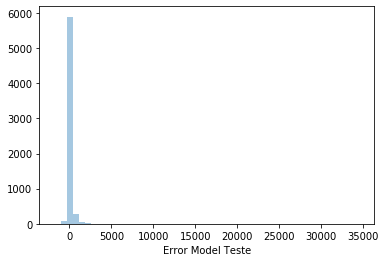

In [211]:
sns.distplot(test['Error Model Teste'], kde = False)

In [212]:
test['Error Model Teste'].describe()

count     6309.000000
mean        88.659222
std        824.392099
min      -1778.200826
25%        -33.894149
50%          9.962434
75%         81.103534
max      34499.473836
Name: Error Model Teste, dtype: float64

In [213]:
q10, q90 = np.quantile(test['Error Model Teste'], .1), np.quantile(test['Error Model Teste'], .9)
q10, q90

(-92.92911896602354, 234.68671797929574)

Entre o 10º quantil e o 90º quantil temos 80% dos dados e temos um erro relativamente baixo.

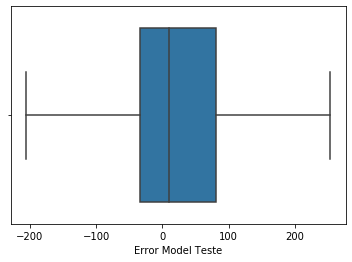

In [238]:
sns.boxplot(test['Error Model Teste'], showfliers=False)

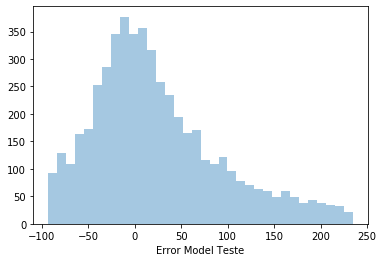

In [214]:
sns.distplot(test['Error Model Teste'][test['Error Model Teste'].between(q10,q90)], kde = False)

Podemos notar que nosso erro se concentra em torno de zero, porém, talvez falte alguma variável que ajude a identificar os alugueis mais caros.

Por existirem esses altos valores de erro, podemos notar que o modelo não se ajustou tão bem a alugueis com valores altíssimos.

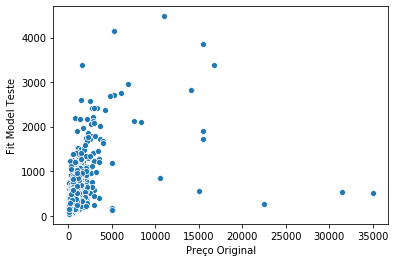

In [239]:
sns.scatterplot(data=test, x='Preço Original', y='Fit Model Teste')

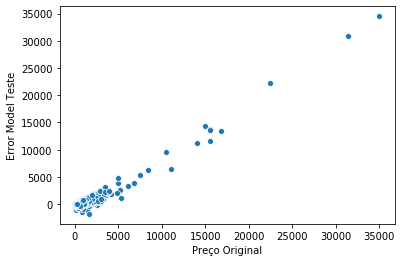

In [240]:
sns.scatterplot(data=test, x='Preço Original', y='Error Model Teste')

Podemos notar que existem poucos valores muito altos, como visto anteriormente, será analisado o resíduo de até o 90º percentil.

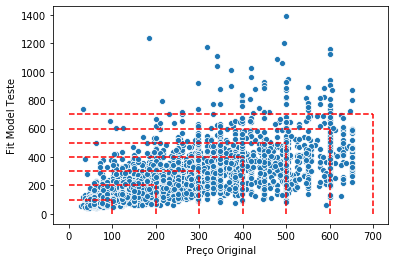

In [243]:
sns.scatterplot(data=test[test['Preço Original'] <= test['Preço Original'].quantile(.90)], x='Preço Original', y='Fit Model Teste')
for i in range(100, 800, 100):
    plt.hlines(y = i, xmin = 0, xmax=i, color='red', linestyle='--')
    plt.vlines(x = i, ymin = 0, ymax=i, color='red', linestyle='--')

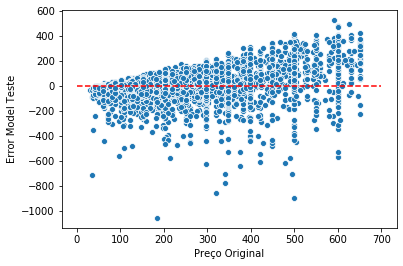

In [244]:
sns.scatterplot(data=test[test['Preço Original'] <= test['Preço Original'].quantile(.90)], x='Preço Original', y='Error Model Teste')
plt.hlines(y = 0, xmin = 0, xmax = 700, color='red', linestyle='--')

O modelo não parece tão bem ajustado, pois além do aumento da variabilidade das previsões com o aumento do preço, o modelo aumenta o erro também.

Provavelmente falta a identificação de alguma variável para a melhor identificação dos alugueis mais caros.